# Santander Value Prediction

### Project Overview

According to Epsilon research, 80% of customers are more likely to do business with you if you provide personalized service. Banking is no exception.

The digitalization of everyday lives means that customers expect services to be delivered in a personalized and timely manner… and often before they´ve even realized they need the service. Santander Group aims to go a step beyond recognizing that there is a need to provide a customer a financial service and intends to determine the amount or value of the customer's transaction. This means anticipating customer needs in a more concrete, but also simple and personal way. With so many choices for financial services, this need is greater now than ever before.

In this project, Santander Group is asking to help them identify the value of transactions for each potential customer. This is a first step that Santander needs to nail in order to personalize their services at scale.

### Problem Statement

In this competition, Santander Group is asking us to help them identify the value of transactions for each potential customer. We are provided with an anonymized dataset containing numeric feature variables, the numeric target column, and a string ID column. Our task is to predict the value of target column in the test set.

The evaluation metric for this competition is Root Mean Squared Logarithmic Error. The data set consists of train.csv and test.csv

### Data Summary

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

#Read train dataset
df = pd.read_csv('train.csv')

print ("Training set:")
n_data  = len(df)
n_features = df.shape[1]
print ("Number of Records: {}".format(n_data))
print ("Number of Features: {}".format(n_features))

Training set:
Number of Records: 4459
Number of Features: 4993


### Feature Correlation

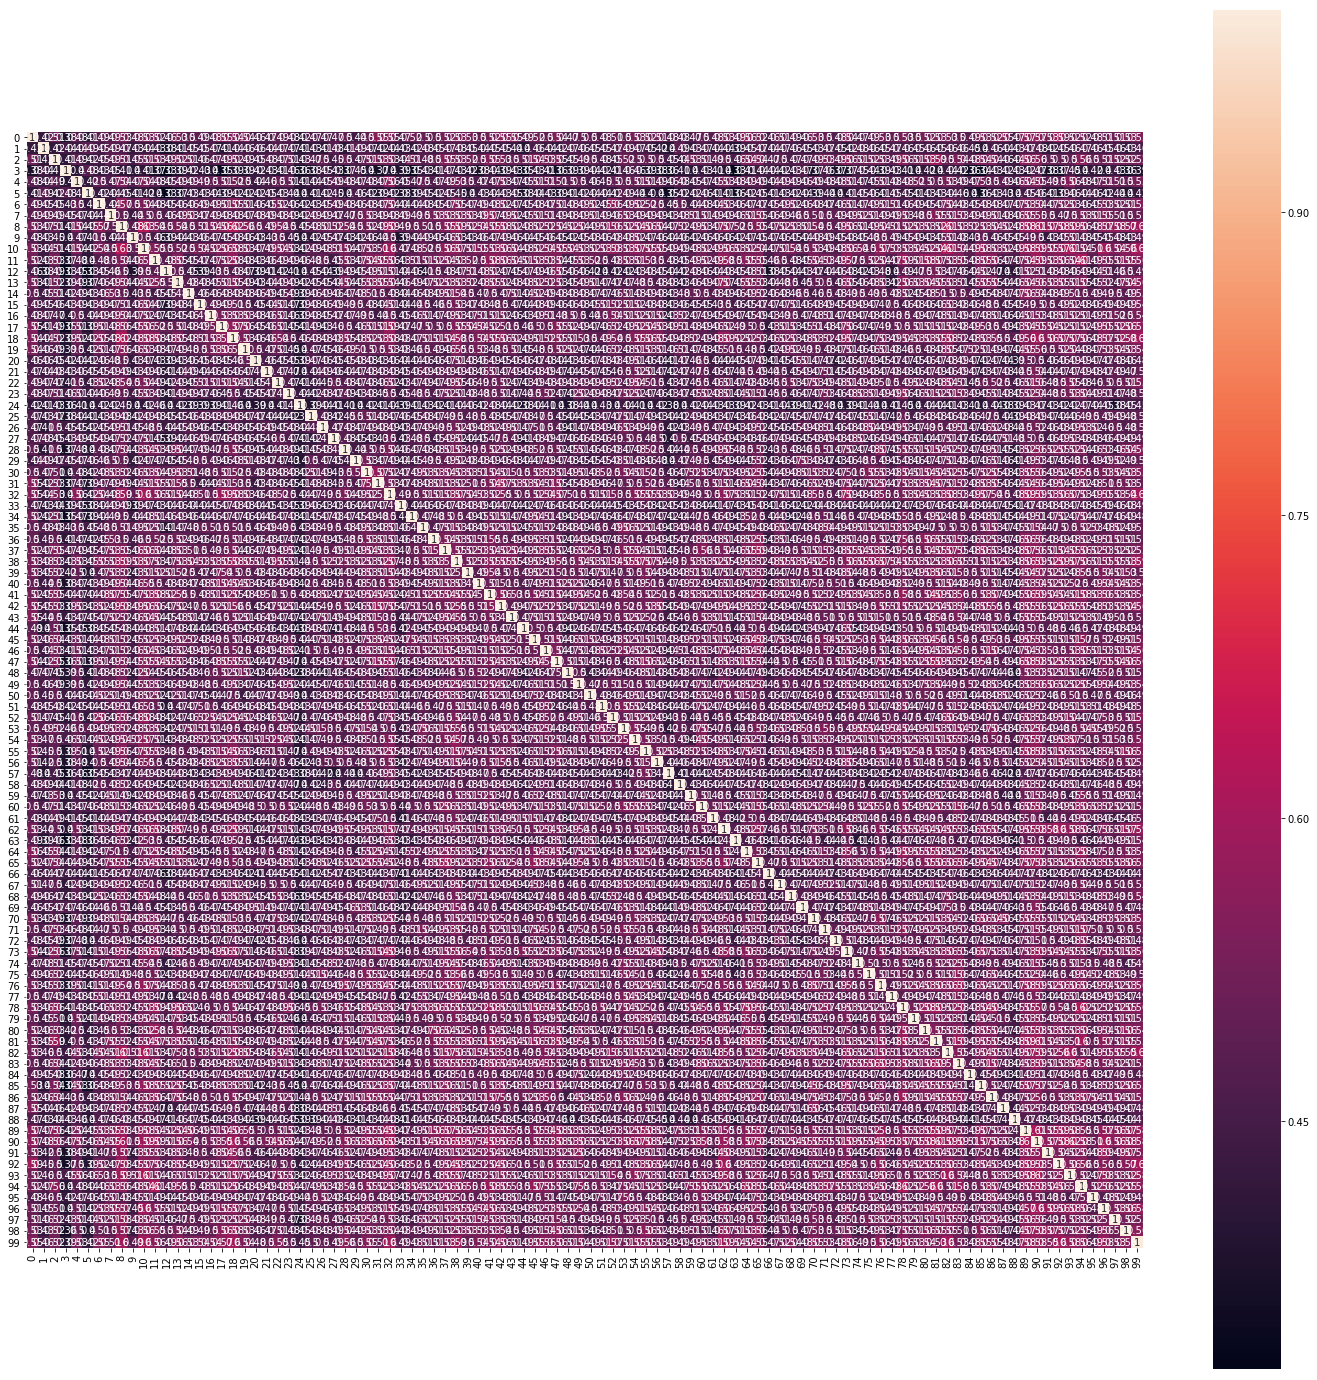

In [36]:
target = np.log1p(df['target'])

df = df.drop(['ID','target'], axis=1)

#Getting the columns with only one None zero value
unique_df = df.nunique().reset_index()
constant_df = unique_df[unique_df[0]==1]
constant_df = constant_df['index'].tolist()

#Droping the columns with only one None zero value
df = df.drop(constant_df, axis=1)

column = df.columns

#Creating 100 new columns by adding batch of 47 columns as one column
a = 0
b = 47
for i in range(0,100):
    if b>len(column):
        df[i] = df.iloc[:,a:].sum(1)
    else:
        df[i] = df.iloc[:,a:b].sum(1)
    a = a + 47
    b = b + 47

df = df.drop(column, axis=1)
columns_1 = df.columns

for i in columns_1:
    df[i] = np.log1p(df[i]+1)

corr = df.corr(method='spearman')
plt.figure(figsize=(25, 25))
sns.heatmap(corr, vmax=1, square=True, annot=True)
plt.show()

### Training Model

In [37]:
#Selecting column 0 - 100
train = df[columns_1]

#Train test split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=45)

#XGBOOST
boost = xgb.XGBRegressor(colsample_bytree=0.055, colsample_bylevel =0.5, 
                             gamma=0.75, learning_rate=0.02, max_depth=32, 
                             objective='reg:linear',booster='gbtree',
                             min_child_weight=57, n_estimators=755, reg_alpha=0, 
                             reg_lambda = 0,eval_metric = 'rmse', subsample=0.7, 
                             silent=1, n_jobs = -1, early_stopping_rounds = 14,
                             random_state =7)
boost.fit(X_train, y_train)
y = boost.predict(X_test)
print(min(y), max(y), y.mean())
print(min(y_test), max(y_test), y_test.mean())
print("XGBOOST Score:")
print(np.sqrt(mean_squared_error(y_test, y)))

#RandomeForest
model = RandomForestRegressor(n_estimators=900, max_features='log2', random_state =9)
model.fit(X_train, y_train)
y_r = model.predict(X_test)
print(min(y_r), max(y_r), y_r.mean())
print(min(y_test), max(y_test), y_test.mean())
print("RandomeForest Score:")
print(np.sqrt(mean_squared_error(y_test, y_r)))

#Averaing the xgboos and Randomforest
y_result = (y * 6) + (y_r * 4)
y_result = y_result/10
print(min(y_result), max(y_result), y_result.mean())
print(min(y_test), max(y_test), y_test.mean())
print("Average Score:")
print(np.sqrt(mean_squared_error(y_test, y_result)))

11.0201 17.0889 14.4903
10.308985993422082 17.50439003707821 14.517225823130834
XGBOOST Score:
1.36141257862
11.1752379561 17.2553915577 14.4251966479
10.308985993422082 17.50439003707821 14.517225823130834
RandomeForest Score:
1.39967136362
11.1556618939 17.1102773506 14.4642538342
10.308985993422082 17.50439003707821 14.517225823130834
Average Score:
1.36109639829


### Conclusion

The models we used for predition are Xgboost Regressor and RandomeFrost. The target value of models are averaged as xgboost at 60% and Randomfrost at 40%. The final Root Mean Squared Logarithmic Error of trained model is1.36109639829.